In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Unfortunately, data files don't always come ready to go; sometimes, a dataset must be processed to prepare it for analysis. This is called *data cleaning*. In this notebook, you'll practice data cleaning using an (artificially) messy version of the Iris dataset. First, we'll read in the file and take a look.

In [2]:
df1 = pd.read_csv('data/iris-messy1.csv')

In [3]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1 inches,3.5,1.4,0.2,Iris-setosa
1,4.9 inches,3.0,1.4,0.2,Iris-setosa
2,4.7 inches,3.2,1.3,0.2,Iris-setosa
3,4.6 inches,3.1,1.5,0.2,Iris-setosa
4,5.0 inches,3.6,1.4,0.2,Iris-setosa


## Part 1: Manipulating column values

In the preview, something looks wrong with the first column of the dataset—the values include the string "inches"! Because of this, we can't treat this column as a numeric value. To fix this, we can edit the column using the [apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) method, which will apply a function to each value in that column.

In [4]:
df1['sepal_length'] # the syntax df['column_name'] returns that column of the dataframe

0     5.1 inches
1     4.9 inches
2     4.7 inches
3     4.6 inches
4     5.0 inches
         ...    
95    5.7 inches
96    5.7 inches
97    6.2 inches
98    5.1 inches
99    5.7 inches
Name: sepal_length, Length: 100, dtype: object

We can pass a *lambda function* to the apply method. A lambda function uses the syntax `lambda x: return_val`, where x is the input argument and return_val is what's returned. For example, `lambda x: x+5` will return the input value + 5.

In [5]:
processed_col = df1['sepal_length'].apply(lambda x: x.replace(" inches","")) # remove the "inches" text
processed_col

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
     ... 
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, Length: 100, dtype: object

By `apply`ing our lambda function to the sepal_length column, we get a new column. Each value from the original column is passed to the lambda function, and the output goes in the new column.

However, we aren't quite done fixing this column yet. Although those values *look* like numbers, the data type in the dataframe is object (see the `dtype: object` at the bottom of the printout)—for now, you can think of this as a string. Eventually, we want to use these values in quantitative analysis, so let's convert them to [floats](https://www.w3schools.com/python/ref_func_float.asp), a numeric data type, using the apply method again.

In [6]:
# TODO: use the float() function to convert x to a numeric type
float_col = processed_col.apply(float) 
float_col

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
     ... 
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, Length: 100, dtype: float64

Now your column should have `dtype: float64`. Great—let's put these cleaned values back into our dataframe. We can do this with the same `df[column_name]` syntax we used earlier:

In [7]:
df1['sepal_length'] = float_col

In [8]:
# TODO: take a look at the dataframe to make sure your new column looks good!
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Part 2: Manipulating multiple columns

We actually asked two different scientists to go measure iris flowers for us. We've just looked at the measurements from the first scientist in part 1; now, let's take a look at the data from the second scientist.

In [9]:
df2 = pd.read_csv('data/iris-messy2.csv')

In [10]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,16.002,8.382,15.240,6.350,Iris-virginica
1,14.732,6.858,12.954,4.826,Iris-virginica
2,18.034,7.620,14.986,5.334,Iris-virginica
3,16.002,7.366,14.224,4.572,Iris-virginica
4,16.510,7.620,14.732,5.588,Iris-virginica


Oh no, I forgot! The second scientist is from Europe—they must have taken the measurements in *centimeters*! We'll need to convert these measurements to inches so the data can be combined with the first dataset. We'll need to divide all four of the variable columns by the conversion factor (`2.54`). (Note: you can actually do this in pandas with `df['column_name']/2.54`, but we'll use the `apply` method with a lambda function to practice it one more time.)

In [11]:
# select multiple columns of a pandas dataframe using df[list_of_column_names]
feature_columns = ['sepal_length','sepal_width','petal_length','petal_width']
df2[feature_columns].head()

,sepal_length,sepal_width,petal_length,petal_width
0,16.002,8.382,15.240,6.350
1,14.732,6.858,12.954,4.826
2,18.034,7.620,14.986,5.334
3,16.002,7.366,14.224,4.572
4,16.510,7.620,14.732,5.588


In [12]:
# TODO: use the apply function to divide the four feature_columns by 2.54
inches_vals = df2[feature_columns].apply(lambda x: x/2.54)
inches_vals.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.3,3.3,6.0,2.5
1,5.8,2.7,5.1,1.9
2,7.1,3.0,5.9,2.1
3,6.3,2.9,5.6,1.8
4,6.5,3.0,5.8,2.2


Great! Now that we have the values in inches, let's change the values in our dataframe. 

In [13]:
# we can set multiple columns of the dataframe using the same syntax as above
df2[feature_columns] = inches_vals

In [14]:
# TODO: take a look at the dataframe to make sure it has the values in inches
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.1,3.0,5.9,2.1,Iris-virginica
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica


## Part 3: Combining two DataFrames

Now that `df1` and `df2` are both using inches, let's combine them into a single dataframe. To do this, we'll need to use the pandas [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) function, which joins together multiple dataframes. First, let's check the shape of both dataframes.

In [15]:
df1.shape

(100, 5)

In [16]:
df2.shape

(50, 5)

It looks like the first scientist collected samples of 100 flowers (i.e., there are 100 rows in `df1`) and the second scientist measured 50 flowers (i.e., there are 50 rows in `df2`). Both dataframes have 5 columns (and we saw in the previous sections that those columns are in the same order, with the same names) so they should be easy to combine! Our new dataset should have information about all 150 flowers, with the same columns, so we are expecting its shape to be `(150, 5)`.

In [17]:
dfs = [df1, df2] # TODO: create a list containing df1 and df2
df = pd.concat(dfs)

In [18]:
df.shape # TODO: check if the shape of the combined dataframe is what we expected

(150, 5)

Perfect! We now have created a single dataframe object that stores the data from both scientists. We'll reset the index (numbers displayed on the very left side of the dataframe) so we don't have, for example, two rows labeled #1. 

In [19]:
df = df.reset_index(drop=True)

## Part 4: Checking data quality

Before this dataset is ready to go, let's do some final checks to make sure our data are clean.

To investigate a numerical variable, one tool we can use is a plot called a *histogram*. This type of graph visualizes what values the variable takes on. Let's look at a histogram for sepal length:

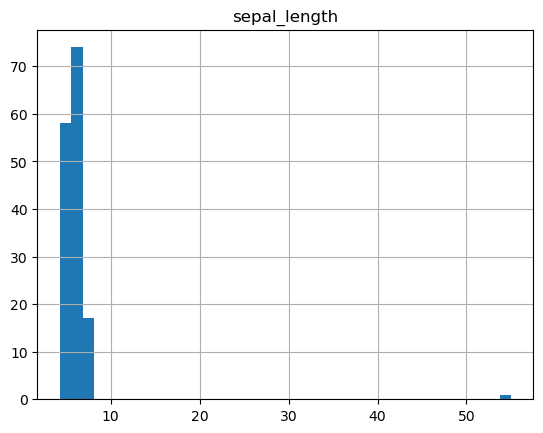

In [20]:
df.hist(column='sepal_length', bins=40)
plt.show()

Here, the x axis represents the sepal length value, and the y axis counts how many rows have a sepal length at that value. It looks like most of the rows of our dataframe have a sepal length between about 5 and 8 inches. However, there is one *outlier*—a point that doesn't look like the rest. This flower has a sepal length of over 50 inches, which sounds pretty unrealistic.

Let's see if we can take a closer look at that outlier. We can use the [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method on our dataframe to sort the data by a particular column. We'll sort it in descending order (with the argument `ascending=False`) so that the largest values are first.

In [21]:
var_name = "sepal_length" # TODO: enter the name of the column we want to sort by
df.sort_values(by=var_name, ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,class
81,55.0,24.0,37.0,10.0,Iris-versicolor
131,7.9,3.8,6.4,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa


Weird—it looks like this row has much higher values for all four numeric columns. Let's compute some summary statistics for each column for comparison.

In [38]:
# TODO: compute summary statistics of the numeric columns (hint: we've done this before!)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,6.479333,3.408000,4.064667,1.276667
std,5.493331,3.138707,3.331891,1.054642
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,55.000000,35.000000,37.000000,10.000000


In comparison to the mean and median (i.e., 50% quantile) of the data, our outlier is about 10 times as high! I called the scientist to investigate and they realized they'd accidentally left off the decimal points in that row (so 5.5 inches became 55, which pandas displays as 55.0).

Looking again at the sorted dataframe, the outlier row is #81. We can use the pandas function [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) to access specific rows and columns of the DataFrame.

In [27]:
df.loc[81] # access row 81

sepal_length               0.55
sepal_width                0.24
petal_length               0.37
petal_width                 0.1
class           Iris-versicolor
Name: 81, dtype: object

In [28]:
df.loc[81, feature_columns] # access row 81 and the numeric columns

sepal_length    0.55
sepal_width     0.24
petal_length    0.37
petal_width      0.1
Name: 81, dtype: object

Based on what you've done in the previous sections, update the DataFrame with the corrected values.

In [26]:
# TODO: divide the incorrect values by 10
df.loc[81,feature_columns] = df.loc[81,feature_columns].apply(lambda x: x/10)

In a real analysis, we'd want to look carefully at all four numeric features, but for now, let's move on to checking the class variable. This column of the dataset is a *categorical* variable, meaning it can be any value from some pre-defined set of categories (in this case, the three species of flower). We can check if the values in our DataFrame follow this rule using the pandas [unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) function. This function shows all of the different values (in this case, strings) that are present in a given column.

In [29]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Virginica'],
      dtype=object)

Uh oh—it looks like we have four different values in this column instead of three. The shorter name "Virginica" was used somewhere, instead of the category name "Iris-virginica" that should be used.

Using what you've done so far, change the "Virginica" value to "Iris-virginica".

In [ ]:
# TODO: use sort_values to find the "Virginica" row (hint: sort_values sorts strings alphabetically)

In [30]:
df.sort_values(by='class', ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,class
139,6.9,3.1,5.4,2.1,Virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
...,...,...,...,...,...
31,5.4,3.4,1.5,0.4,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa


In [31]:
# TODO: use .loc to change the value for that row number and the "class" column to the correct value

In [33]:
df.loc[139, 'class'] = "Iris-virginica"

In [34]:
# TODO: use the unique() function to check that there are now only three unique values

In [35]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Part 5: Saving the dataset

Finally, we finished cleaning the Iris dataset. We can save our finished product as a `.csv` (comma-separated values) file. This is a common file format for storing datasets, and we can easily read it back into a pandas DataFrame later. Pandas has a [to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) method to do this.

In [37]:
filename = 'data/iris_clean.csv'
df.to_csv(filename, index=None)